# 201721510 김수현
# 9주차 텍스트마이닝 실습2
# 01. 토픽모델링

## Topic Modeling with Sklearn

영화 리뷰 데이터를 이용하여 topic modeling을 학습

### Topic Modeling이란?

참조: https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/06/01/LDA/

토픽모델링은 텍스트 형태로 되어 있는 다수의 문서들로부터 공통적으로 내재되어 있는 주제들을 추출하기 위한 방법론이다. <br>
토픽모델링의 기본적인 가정은, 저자들이 문서를 작성할 때 먼저 특정한 주제들을 정하고 나서 그러한 주제들로부터 문장을 구성한다는 것이다. 따라서 문서를 구성하는 단어들은 그 주제들로부터 파생되어진 것으로 볼 수 있으며, 토픽모델링은 문서와 단어들에 대해 통계적인 추론을 수행하여 본래의 주제들을 찾아내는 방법이라고 할 수 있다.  <br>
이러한 작업을 하기 위해서는 먼저 자연어로 기술되어 있는 문서들에 대해 형태소 분석을 함으로써 문장들을 개별 단어로 분리해야 한다. 
 <br>
토픽모델링의 가장 대표적인 알고리즘은 LDA(Latent Dirichlet Allocation)로 알려져 있다.  <br>
LDA는 Blei et al. (2003)에 의해 제안된 알고리즘으로, 앞서 설명한 바와 같이, 확률기법을 기반으로 하여 문서의 토픽 분포를 추론한다.  <br>
LDA에서 토픽은 주제를 의미하는 용어로 사용되며, 각 문서들이 특정한 주제에 속할 확률분포와 주제로부터 특정 단어들이 파생되어 나올 확률분포가 주어졌을 때, 이 두 확률분포를 조합하여 각 문서들에 들어가는 단어들의 확률분포를 계산해낸다.  <br>
아래 그림에서 θ는 문서들이 각 주제들에 속할 확률분포를 나타내며 디리클레분포의 매개변수인 α에 의해 결정된다.  <br>
그림에서 N은 특정 문서에 속한 단어의 집합이며, M은 전체 문서의 집합을 나타낸다. z는 문서 내의 단어들이 주제들에 속할 확률분포를 나타내며, 이는 θ에 의한 다항분포로 선택된다.  <br>
β는 각 주제가 특정 단어를 생성할 확률을 나타내는 확률분포이며, 결국 z와 β에 의해 실제 문서들의 단어분포인 w가 결정된다.  <br>
이 모형에서 w만이 실제로 문서들을 통해 주어진 분포이고 나머지는 모두 잠재변수이다.  <br>
LDA 알고리즘에서는 주어진 문서와 토픽들의 사전확률 분포인 α와 토픽 내에서 단어의 사전확률분포인 β의 파라미터 값을 활용해 반복적인 시뮬레이션을 통해 z와 θ를 추정한다. 

![topic.png](topic.png)

다음무비에서 추출한 영화 리뷰를 불러온다.

In [6]:
import csv
text = []
y = []

with open('movie_data_new(1).csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row and len(row[0]) > 10: #review 길이가 10자 이상인 경우만
#        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[0]) #영화 리뷰를 text 리스트에 추가
            y.append(row[2]) #영화이름을 text 리스트에 추가

In [7]:
print('리뷰 수:', len(text))
print('리뷰영화:', set(y))

리뷰 수: 12445
리뷰영화: {'신과함께', '라라랜드', '인피니티 워', '곤지암', '범죄도시', '택시운전사', '코코'}


In [8]:
text[:10]

['헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...',
 '개연성은 무시해라 액션을 즐겨라 스타로드가 이끌어준다 각각의 영웅들을 즐겨라 그리고 단적인 신념이 얼마나 부질없는지 보셔라',
 '정말 지루할틈없이 넘잘만들었다 역시 대단하다',
 '마지막에 누구한테 연락한거지? 궁금',
 '다음 편이 궁굼해지네요^^',
 '안잼있는사람 있음???????????',
 '잘 만들었다! 지루할 틈이 없네...',
 '이제는 지겨워서 못보겠다',
 '롱턱 타노스의  장갑이 참 맘에 듬.  아이언 맨과 토르 닥터만 생고생하고..  가디언즈 오브 갤럭시 들 때문에  손해가 크다고 봄  들짐승 하고 칡뿌리 같은 캐릭이  재미를 더해줄줄 알았으나  아쉬움 . 분노의 상징 헐크가 겁을 먹다니..로키의 초반 출연뿐이 서운하지만  본 영화에 이어질 내용에 적합하지 않은지 서두에  죽는부분으로 마무리 됨은 심섬한 충격임 .  다음편에 헬라가 다시 나올까?',
 '와~~~~~진짜 개쪄는 인피니티워!!몇번을 봐도 개지린다.너무잼있다.어벤져스4도 너무 기대된다.빨리 2019년이왔으면 좋겠다.']

#### 한글 처리를 위해서는 konlpy가 필요

topic modeling은 count vector를 사용하므로 sklearn의 CountVectorizer를 사용

In [9]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [10]:
review_cv.shape

(12445, 1000)

#### sklearn의 LatentDirichletAllocation을 이용하여 topic modeling 수행
다양한 argument를 적절히 이용하는 것이 중요

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [12]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (12445, 10)


#### topic을 보기 쉽게 출력하는 함수를 작성

In [14]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [15]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 사람, 보고, 내용, 원작, 편, 마블, 이해, 노스, 다음, 결말
Topic #1: 더, 말, 듯, 그, 사랑, 이야기, 것, 현실, 조금, 대한
Topic #2: 좀, 수, 볼, 것, 부분, 끝, 함, 눈, 느낌, 소재
Topic #3: 점, 정말, 꼭, 내, 때, 음악, 영화, 때문, 중, 신
Topic #4: 이, 정도, 왜, 신파, 그냥, 한국, 영화, 작품, 감독, 관객
Topic #5: 연기, 배우, 최고, 마동석, 윤계상, 액션, 송강호, 역시, 연기력, 조연
Topic #6: 스토리, 진짜, 눈물, 감동, 기대, 마지막, 재미, 또, 웹툰, 모두
Topic #7: 영화, 생각, 감동, 가족, 다시, 한번, 보기, 처음, 아이, 추천
Topic #8: 광주, 장면, 중간, 그, 역사, 우리, 가슴, 번, 분, 택시
Topic #9: 시간, 돈, 나, 평점, 거, 뭐, 공포영화, 공포, 별로, 애



#### 한 자로 구성된 명사들은 의미파악이 어려우므로 삭제할 필요가 있음
두 자 이상만 반환하는 함수를 작성

In [16]:
twitter_tag.nouns(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '적', '신념', '얼마나']

In [17]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [18]:
tokenizer(text[1])

['개연', '성은', '무시', '액션', '스타로드', '각각', '영웅', '신념', '얼마나']

'적'과 같이 한 자로 된 단어를 제거하고 count vector 생성

In [19]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [20]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 느낌, 관객, 공포, 얘기, 영화, 갈수록, 상상, 노잼, 스트레스, 내년
Topic #1: 가족, 지옥, 대한, 설정, 저승, 부모님, 점수, 영화, 생각, 점도
Topic #2: 영화, 눈물, 이건, 진짜, 댓글, 시나리오, 억지로, 라라, 랜드, 인생
Topic #3: 연기, 차태현, 김동욱, 주지훈, 이후, 대해, 여자, 진짜, 김향기, 막판
Topic #4: 송강호, 택시, 가슴, 계속, 기자, 운전사, 정신, 해도, 영화, 한마디
Topic #5: 아이, 영화, 강철, 보고, 세상, 설명, 생각, 아주, 마음, 부모
Topic #6: 영화관, 영화, 편이, 가지, 인상, 유머, 또한, 도대체, 재즈, 장첸
Topic #7: 기대, 귀신, 기분, 시대, 명작, 형사, 영화, 외국, 최고, 추석
Topic #8: 영화, 약간, 시작, 세계, 구성, 그것, 요즘, 정말, 눈물, 한번
Topic #9: 부분, 추천, 나름, 소리, 라면, 아주, 순간, 다큐, 보시, 오역
Topic #10: 신파, 억지, 엄마, 드라마, 눈물, 중국, 스케일, 영화, 주제, 스토리
Topic #11: 다시, 인간, 집중, 한번, 정도, 영웅, 영화, 시간, 추격, 시도
Topic #12: 원작, 연기력, 다른, 영화, 올해, 자신, 요소, 효과, 문제, 폭력
Topic #13: 마블, 노스, 결말, 어벤져스, 히어로, 이해, 시리즈, 다음, 이번, 토르
Topic #14: 역시, 영화, 생각, 박수, 충격, 정도, 이승, 기대, 꿀잼, 사후세계
Topic #15: 액션, 영화, 범죄, 도시, 최고, 취향, 남한, 모두, 재미, 산성
Topic #16: 광주, 역사, 시민, 위해, 전두환, 민주화, 희생, 운동, 민주주의, 가슴
Topic #17: 영화, 가장, 상영, 처음, 정말, 나라, 반성, 각색, 관객수, 대안
Topic #18: 감독, 영화, 천만, 최악, 수준, 개연, 한국, 스크린, 헐리웃, 진짜
Topic #19: 중간, 영화, 이제, 매우, 

50개의 topic들을 대상으로 clustering을 수행해서 topic들이 잘 묶을 수 있는지 확인

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [4 4 4 3 4 4 4 4 4 2 2 4 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 2 4 1 4 4 4 4 4 0 4 2 4 4]


T-SNE를 이용하여 각 topic들 간의 관계를 시각화

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([-15.296861 , -39.90289  , -37.609985 ,  49.19102  , -52.164654 ,
        -8.414497 , -15.57928  , -11.724362 ,   1.5109495,   2.5873883,
       -59.02956  ,  50.243515 , -66.458115 , -54.538612 , -16.422346 ,
        30.576548 ,  69.73726  ,  -4.002888 , -39.174034 ,  45.472694 ,
        17.013813 , -21.773487 ,  32.97722  ,   3.441639 , -35.254948 ,
        26.405207 ,  15.255535 ,  18.549217 , -23.893627 ,   9.8831625,
        55.319622 , -21.825891 ,  11.997019 , -30.098207 ,  30.140793 ,
        24.391329 , -32.897675 ,   4.040865 , -25.433115 ,  -2.9563794,
         1.5145319, -11.222951 , -12.10169  ,   7.3333883,   7.2696347,
        33.792927 ,  12.837804 ,  32.59087  ,  -4.5664673,  33.163807 ],
      dtype=float32)

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

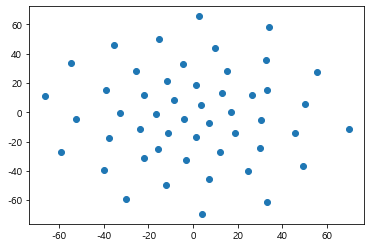

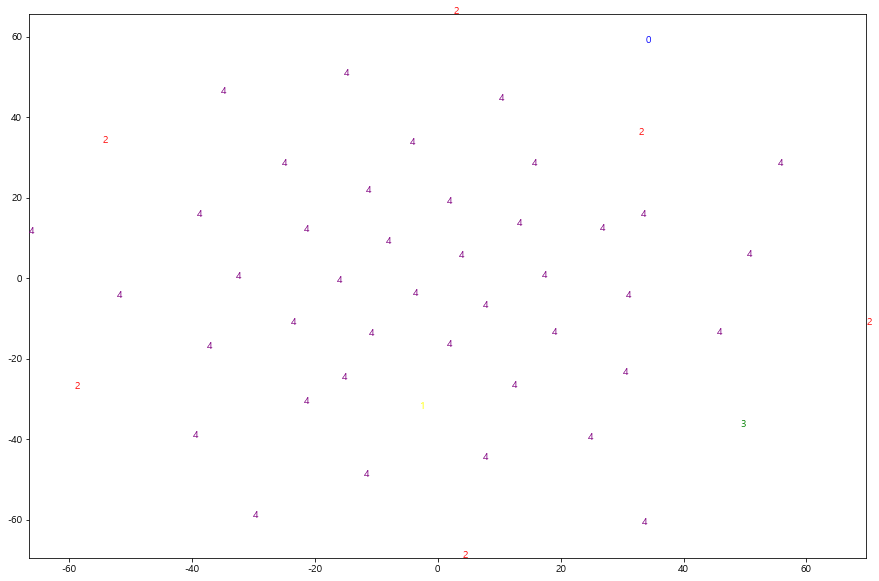

In [24]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

#### 최적의 결과를 찾기 위한 방법
적절한 topic의 수는 perplexity 값을 이용해 찾음.<br>
낮을 수록 좋은 모형이나, 사람의 판단과 일치하지 않을 수 있음<br>
http://qpleple.com/perplexity-to-evaluate-topic-models/ <br>
그 외에 alpha, beta는 앞서 설명한 바와 같이 beta=0.1로 고정하고 alpha를 50/토픽수 근처에서 찾아나감<br>
반복횟수는 5,000번 정도면 수렴

In [25]:
lda.perplexity(review_cv)

583.6818103950467

In [26]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 영화, 느낌, 관객, 얘기, 사람, 곤지암, 감동, 갈수록, 시간, 지루함
Topic #1: 가족, 영화, 설정, 저승, 감동, 점수, 부모님, 생각, 여자, 사람
Topic #2: 영화, 눈물, 생각, 진짜, 시나리오, 이건, 스토리, 인정, 감동, 시작
Topic #3: 연기, 차태현, 하정우, 진짜, 김동욱, 눈물, 어머니, 주지훈, 영화, 신파
Topic #4: 영화, 계속, 기자, 그냥, 연기, 정신, 배우, 정말, 알바, 상황
Topic #5: 영화, 아이, 사랑, 강철, 무슨, 보고, 마음, 관람, 평가, 아주
Topic #6: 영화, 인상, 가지, 유머, 일단, 제대로, 도대체, 재즈, 한국, 기대
Topic #7: 공포, 영화, 귀신, 연출, 형사, 외국, 거의, 코드, 명작, 흥행
Topic #8: 영화, 세계, 사람, 약간, 정말, 쓰레기, 그것, 실감, 감동, 구성
Topic #9: 영화, 소리, 추천, 부분, 나름, 아들, 순간, 다큐, 연기자, 영화인
Topic #10: 영화, 그냥, 집중, 드라마, 중국, 눈물, 감동, 생각, 감성, 만화
Topic #11: 윤계상, 연기, 마동석, 인간, 영화, 조선족, 다시, 영웅, 배우, 역할
Topic #12: 영화, 원작, 연기력, 생각, 요소, 올해, 실제, 감동, 효과, 초딩
Topic #13: 마블, 노스, 어벤져스, 히어로, 캐릭터, 시리즈, 이해, 이번, 예고편, 영화
Topic #14: 영화, 디즈니, 생각, 눈물, 동안, 자체, 자극, 박수, 정도, 취향
Topic #15: 영화, 범죄, 도시, 감동, 실화, 배우, 캐스팅, 재미, 이후, 신파
Topic #16: 광주, 택시, 역사, 시민, 우리, 위해, 국민, 민주화, 전두환, 진실
Topic #17: 영화, 정말, 교훈, 연기, 반성, 나라, 배우, 스릴, 사람, 보고
Topic #18: 영화, 수준, 관객, 최악, 감독, 전체, 개연, 천만, 배우, 역대
Topic #19: 영화, 감동, 정말, 연기, 코

556.1538487000632

In [27]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 느낌, 공포영화, 한국, 별로, 관객, 공포, 정도, 전개, 초반, 영화관
Topic #1: 감동, 사람, 생각, 재미, 가족, 모두, 이야기, 보기, 대한, 지옥
Topic #2: 영화, 음악, 인생, 처음, 생각, 최악, 상영, 시작, 간만, 댓글
Topic #3: 연기, 배우, 진짜, 마동석, 윤계상, 신파, 장면, 눈물, 차태현, 액션
Topic #4: 정말, 그냥, 다시, 가슴, 택시, 몰입, 소재, 내내, 영화로, 알바
Topic #5: 보고, 내용, 눈물, 사랑, 마음, 수준, 현실, 아이, 기억, 한국영
Topic #6: 광주, 기대, 중간, 우리, 웹툰, 사실, 시민, 인간, 나름, 실망
Topic #7: 최고, 마지막, 평점, 감독, 역사, 송강호, 역시, 작품, 연출, 귀신
Topic #8: 스토리, 원작, 한번, 정도, 완전, 천만, 주인공, 지금, 가장, 약간
Topic #9: 시간, 마블, 하나, 이해, 부분, 추천, 노스, 다음, 결말, 영상



425.97775168150275

## Topic Modeling with Gensim

In [28]:
!pip install gensim
!pip install pyldavis

  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107102 sha256=033fddc8af88102debf969223b03a05ee6c01eaa3f86f954ce02645a45d774dc
  Stored in directory: c:\users\soo hyun\appdata\local\pip\cache\wheels\11\73\9a\f91ac1f1816436b16423617c5be5db048697ff152a9c4346f2
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97716 sha256=65e3224b9a42b36ce02b51ebb2014a8919aabf142249d97c4978687d92c631db
  Stored in directory: c:\users\soo hyun\appdata\local\pip\cache\wheels\31\8c\a0\24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd
Successfully built pyldavis


In [29]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train',
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

In [30]:
# 필요한 library들을 import
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re

In [31]:
def tokenize(text):
    min_length = 3 #최소 단어 크기
    # nltk의 tokenizer를 이용해서 word 추출한 후에 소문자로 변환
    words = map(lambda word: word.lower(), word_tokenize(text))
    #words = word_tokenize(text.lower()) #이렇게 해도 되는지 확인
    # stopwords 제외
    words = [word for word in words if word not in cachedStopWords]
    # portr stemmer 적용
    tokens = (list(map(lambda token: PorterStemmer().stem(token),words)))
    #tokens = [PorterStemmer().stem(token) for token in words]  #이렇게 해도 되는지 확인
    #알파벳으로 이루어진 단어들만 추출
    p = re.compile('[a-zA-Z]+');
    filtered_tokens = list(filter (lambda token: p.match(token) and len(token) >= min_length,tokens))
    #filtered_tokens = [token for token in tokens if p.match(token) and len(token) >= min_length]   #이렇게 해도 되는지 확인
    return filtered_tokens

In [32]:
docs = [tokenize(doc) for doc in newsgroups_train.data]

In [33]:
print(newsgroups_train.data[0])
print(docs[0])

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
['notic', 'save', 'model', 'map', 'plane', 'posit', 'care', 'file', 'reload', 'restart', 'given', 'default', 'posit', 'orient', 'save', 'file', 'positions/orient', 'preserv', 'anyon', 'know', 'inform', 'store', 'file', 'noth', 'explicitli', 'said', 'manual', 'save', 'textur', 'rule', 'file', 'like', 'abl', 'read', 'textur', 'rule', 'inform', 'anyon', 'format', 'file', 'file', 'format', 'a

Gensim으로 topic modeling을 하기 위해서는 Dictionary, Corpus, Model의 3단계를 거쳐야 함

In [34]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=3, no_above=0.5)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 19660
Number of unique words after removing rare and common words: 5628


In [35]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 5628
Number of documents: 2034


In [36]:
from gensim.models import LdaModel
# Set training parameters.
num_topics = 25
chunksize = 500 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 40
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 4min 28s


In [37]:
! pip install pyldavis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort=True)

## pandas_topicmodel

다음무비에서 추출한 영화 리뷰를 불러온다.

In [103]:
import pandas as pd

movie = pd.read_csv('movie_data_new(1).csv', header = None) # header를 None으로 설정해 header가 없음을 알림

print('리뷰 수:', len(movie))
print('리뷰영화:', set(movie.iloc[:,2])) # pandas dataframe에 접근하기 위해서는 iloc를 사용. 전체행에 대해 3번째 열만 인덱싱

리뷰 수: 14967
리뷰영화: {'신과함께', '라라랜드', '인피니티 워', '곤지암', '범죄도시', '택시운전사', '코코'}


In [113]:
print(movie.iloc[:10])

                                                   0   1       2
0                     헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...  10  인피니티 워
1                                              충격 결말   9  인피니티 워
2                                                응집력   8  인피니티 워
3  개연성은 무시해라 액션을 즐겨라 스타로드가 이끌어준다 각각의 영웅들을 즐겨라 그리고...   8  인피니티 워
4                                           내가졸라이상하네   4  인피니티 워
5                                                 대박  10  인피니티 워
6                           정말 지루할틈없이 넘잘만들었다 역시 대단하다   9  인피니티 워
7                                          역시 어벤져스!!   9  인피니티 워
8                                마지막에 누구한테 연락한거지? 궁금   9  인피니티 워
9                                     다음 편이 궁굼해지네요^^  10  인피니티 워


In [65]:
text = movie.loc[:,0] # 전체행에 대해 1번째 열만 인덱싱 - 리뷰들만 가져옴

#### 한글 처리를 위해서는 konlpy가 필요

topic modeling은 count vector를 사용하므로 sklearn의 CountVectorizer를 사용

In [66]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [67]:
review_cv.shape

(14967, 1000)

#### sklearn의 LatentDirichletAllocation을 이용하여 topic modeling 수행
다양한 argument를 적절히 이용하는 것이 중요

In [68]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [69]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (14967, 10)


#### topic을 보기 쉽게 출력하는 함수를 작성

In [71]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [75]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 영화, 것, 돈, 중간, 감독, 처음, 끝, 소재, 이건, 연출
Topic #1: 스토리, 그냥, 내용, 볼, 좀, 느낌, 부분, 임, 함, 도
Topic #2: 감동, 사람, 눈물, 원작, 왜, 가족, 저, 웹툰, 나, 생각
Topic #3: 광주, 그, 꼭, 다시, 역사, 수, 가슴, 우리, 송강호, 한번
Topic #4: 영화, 생각, 더, 때, 만, 한국영, 이상, 이, 우리나라, 영화로
Topic #5: 정말, 최고, 재미, 시간, 안, 하나, 별로, 역시, 추천, 중
Topic #6: 연기, 진짜, 배우, 마동석, 윤계상, 신파, 액션, 완전, 대박, 굿
Topic #7: 보고, 기대, 편, 마블, 또, 노스, 다음, 개, 결말, 캐릭터
Topic #8: 점, 정도, 이, 평점, 내, 한국, 뭐, 공포영화, 영화, 수준
Topic #9: 마지막, 장면, 음악, 인생, 사랑, 영화, 이야기, 번, 현실, 눈



#### 한 자로 구성된 명사들은 의미파악이 어려우므로 삭제할 필요가 있음
두 자 이상만 반환하는 함수를 작성

In [77]:
twitter_tag.nouns(text[1])

['충격', '결말']

In [78]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [79]:
tokenizer(text[1])

['충격', '결말']

'적'과 같이 한 자로 된 단어를 제거하고 count vector 생성

In [80]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [81]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 영화, 상영, 느낌, 자극, 갈수록, 스크린, 취향, 노력, 분위기, 감동
Topic #1: 마블, 노스, 이상, 히어로, 그래픽, 얘기, 영화, 인피니티, 점도, 폭력
Topic #2: 송강호, 위해, 국민, 대한민국, 가슴, 엔딩, 희생, 영웅, 보시, 추격
Topic #3: 영화, 지금, 추천, 쓰레기, 누구, 더욱, 시도, 정말, 강력, 블레어
Topic #4: 영화, 관객, 뮤지컬, 강추, 사람, 출연, 해도, 그게, 재즈, 테러
Topic #5: 진짜, 영화, 발전, 점수, 역시, 눈물, 각색, 최고, 간만, 처럼
Topic #6: 한국, 사실, 대사, 중국, 차라리, 상황, 시나리오, 가지, 스케일, 영화
Topic #7: 영화, 완전, 조폭, 경찰, 다가, 눈물, 처음, 코미디, 감동, 사람
Topic #8: 액션, 웃음, 긴장감, 영화, 영화인, 형사, 스릴, 코믹, 연기, 과거
Topic #9: 오늘, 범죄, 도시, 완성, 연기자, 꿀잼, 배우, 반성, 박수, 연기
Topic #10: 평점, 반전, 얼마나, 영화, 등장, 리얼, 짜증, 감동, 훌쩍, 현재
Topic #11: 영화, 최고, 최악, 아들, 올해, 도대체, 심장, 정말, 깡패, 불구
Topic #12: 눈물, 영화, 설정, 무슨, 저승, 신파극, 효과, 나중, 애니, 감상
Topic #13: 대한, 영화로, 인간, 영화, 이해, 오락, 요즘, 반드시, 감동, 감탄
Topic #14: 장면, 스토리, 전개, 집중, 약간, 영화, 내용, 한국영, 시간, 세계관
Topic #15: 정도, 영화, 여운, 시간, 실화, 현실, 처음, 감동, 관객수, 바탕
Topic #16: 가족, 이야기, 기억, 보기, 노래, 디즈니, 코코, 픽사, 겨울왕국, 전형
Topic #17: 영화, 가장, 의미, 사람, 누가, 다소, 살짝, 타임, 라라, 랜드
Topic #18: 원작, 웹툰, 수준, 이제, 김동욱, 댓글, 진심, 기술, 인정, 신파
Topic #19: 영화, 판타지, 마블리, 

50개의 topic들을 대상으로 clustering을 수행해서 topic들이 잘 묶을 수 있는지 확인

In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [1 2 2 1 1 2 2 1 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 2 2 1 2
 3 2 2 2 2 4 1 2 2 1 2 2 1]


T-SNE를 이용하여 각 topic들 간의 관계를 시각화

In [83]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([-26.228304 ,  -9.995025 ,  46.649403 ,  -1.6325508, -27.5668   ,
        81.689156 , -35.28797  ,   2.6156175, -11.304313 ,   4.0795746,
       -55.775806 ,  21.656673 , -19.19056  ,  23.783792 , -67.14459  ,
       -86.62832  , -99.21543  , -13.120061 , -67.16767  ,  -2.9208426,
         6.628545 ,  12.393151 , -27.701046 ,  56.70328  ,  -7.2939367,
       -27.095646 ,  16.027466 , -55.12867  , -78.64096  ,  55.112484 ,
        25.607193 ,  48.402256 ,  29.979427 , -47.492447 , -45.201675 ,
       -18.965967 ,  28.500086 ,  89.17913  ,  73.051025 , -37.71155  ,
        44.51035  ,  -8.994303 , -10.97403  ,   7.922424 , -11.326307 ,
        29.982994 , -32.869816 , -64.008064 ,   9.55746  , -36.275063 ],
      dtype=float32)

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

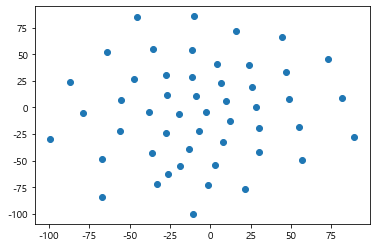

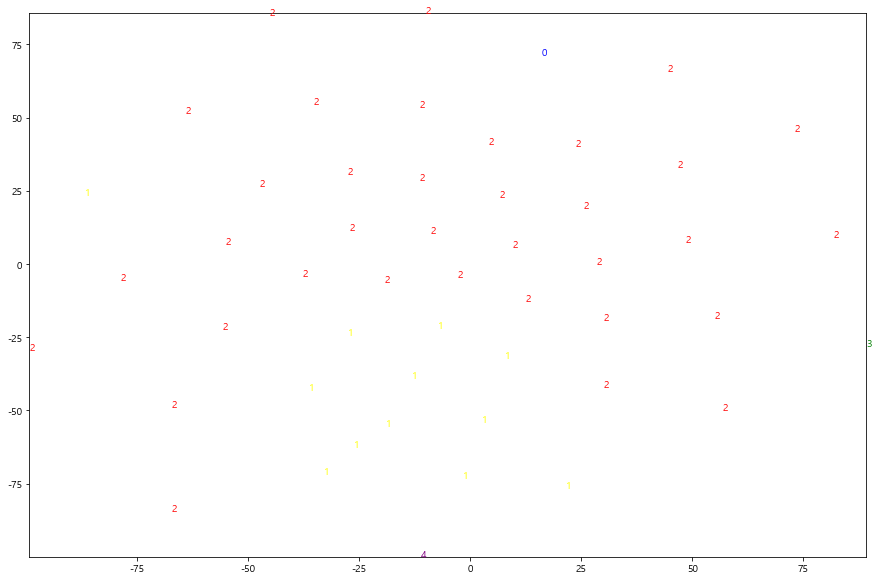

In [85]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

#### 최적의 결과를 찾기 위한 방법
적절한 topic의 수는 perplexity 값을 이용해 찾음.<br>
낮을 수록 좋은 모형이나, 사람의 판단과 일치하지 않을 수 있음<br>
http://qpleple.com/perplexity-to-evaluate-topic-models/ <br>
그 외에 alpha, beta는 앞서 설명한 바와 같이 beta=0.1로 고정하고 alpha를 50/토픽수 근처에서 찾아나감<br>
반복횟수는 5,000번 정도면 수렴

In [86]:
lda.perplexity(review_cv)

579.2360029969906

In [87]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 영화, 아주, 자체, 감동, 노잼, 감성, 자극, 갈수록, 취향, 어른
Topic #1: 마블, 노스, 다음, 영화, 어벤져스, 히어로, 시리즈, 토르, 스톤, 인상
Topic #2: 광주, 택시, 송강호, 시민, 기자, 운전사, 대한민국, 희생, 아픔, 영화
Topic #3: 영화, 음악, 쓰레기, 정말, 누구, 스토리, 뮤지컬, 여운, 마음, 연기
Topic #4: 영화, 관객, 느낌, 사람, 스토리, 진짜, 다만, 해도, 감동, 뮤지컬
Topic #5: 영화, 진짜, 감동, 지루함, 눈물, 연기, 최고, 점수, 캐스팅, 역시
Topic #6: 영화, 한국, 신파, 장면, 중국, 차라리, 상황, 가지, 시나리오, 극장
Topic #7: 영화, 중간, 완전, 대사, 조폭, 경찰, 사람, 결말, 보고, 형사
Topic #8: 영화, 조선족, 긴장감, 정말, 연기, 눈물, 다큐, 스릴, 동생, 분노
Topic #9: 윤계상, 연기, 배우, 영화, 오늘, 범죄, 마동석, 도시, 연기자, 꿀잼
Topic #10: 평점, 영화, 수준, 알바, 생각, 강철, 대해, 초반, 감동, 영화관
Topic #11: 영화, 사랑, 인생, 최악, 최고, 올해, 악역, 자신, 마동석, 윤계상
Topic #12: 영화, 설정, 감동, 무슨, 신파극, 눈물, 순간, 지옥, 개연, 모두
Topic #13: 영화, 소리, 정도, 연기, 이해, 감동, 인간, 안보, 출연, 기대
Topic #14: 영화, 집중, 약간, 생각, 엄마, 스토리, 감동, 한국영, 추천, 초딩
Topic #15: 영화, 실화, 라면, 사람, 남자, 정도, 시간, 현실, 감동, 매력
Topic #16: 가족, 기억, 영화, 영상, 노래, 디즈니, 명작, 코코, 역대, 이야기
Topic #17: 영화, 가장, 사람, 의미, 다소, 생각, 충격, 선택, 내용, 사랑
Topic #18: 영화, 연기, 차태현, 원작, 웹툰, 하정우, 김동욱, 신파, 주지훈, 배우
Topic #19: 영화, 판타지, 감동, 

553.3722509176054

In [88]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 감동, 재미, 기대, 가족, 스토리, 내용, 별로, 웹툰, 추천, 억지
Topic #1: 마블, 사랑, 스토리, 작품, 노스, 이야기, 다음, 모두, 결말, 영상
Topic #2: 광주, 역사, 가슴, 우리, 송강호, 택시, 기억, 지금, 사실, 시민
Topic #3: 영화, 원작, 음악, 스토리, 여운, 영화로, 마음, 뮤지컬, 상영, 쓰레기
Topic #4: 생각, 사람, 그냥, 평점, 보고, 관객, 천만, 이영화, 알바, 지옥
Topic #5: 진짜, 최고, 처음, 역시, 부분, 조금, 내용, 한국영, 이건, 영화
Topic #6: 장면, 정도, 신파, 한국, 감독, 공포영화, 공포, 때문, 연출, 수준
Topic #7: 시간, 보고, 중간, 영화, 다시, 한번, 인생, 완전, 이해, 최악
Topic #8: 정말, 눈물, 마지막, 차태현, 대박, 아이, 하정우, 엄마, 초반, 계속
Topic #9: 연기, 배우, 마동석, 윤계상, 액션, 연기력, 조연, 김동욱, 이제, 오늘



409.1952388313528

# 02. 토픽트렌드
## TopicTrendMovie

In [114]:
import matplotlib
%matplotlib inline
import pandas as pd

In [115]:
data = pd.read_csv("movie_data_include_date.csv", header=None, names=['review', 'rate', 'date', 'title']) #read data

In [120]:
for ix, name in enumerate(data.columns):
    print(i,name)

49 review
49 rate
49 date
49 title


In [122]:
print(data.head())

                                              review  rate        date   title
0                             돈 들인건 티가 나지만 보는 내내 하품만     1  2018.10.29  인피니티 워
1       몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.    10  2018.10.26  인피니티 워
2  이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...     8  2018.10.24  인피니티 워
3                                이 정도면 볼만하다고 할 수 있음!     8  2018.10.22  인피니티 워
4                                               재미있다    10  2018.10.20  인피니티 워


In [123]:
data.review.shape
type(data.review)

pandas.core.series.Series

In [124]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [125]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=tokenizer, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(data.review)

In [126]:
review_cv.shape

(14725, 1000)

In [127]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [128]:
print(review_topics.shape)
type(review_topics)

(14725, 10)


numpy.ndarray

In [129]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [130]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 마지막, 기대, 내용, 마블, 스토리, 부분, 하나, 노스, 조금, 다음
Topic #1: 감동, 최고, 가족, 음악, 인생, 사랑, 마음, 영화, 현실, 우리나라
Topic #2: 연기, 배우, 재미, 감동, 송강호, 역시, 별로, 작품, 내내, 김동욱
Topic #3: 영화, 원작, 웹툰, 이야기, 대한, 다른, 모든, 주인공, 영화로, 아주
Topic #4: 시간, 그냥, 평점, 수준, 관객, 영화, 천만, 이상, 최악, 이건
Topic #5: 생각, 진짜, 눈물, 보고, 신파, 다시, 한번, 아이, 억지, 엄마
Topic #6: 스토리, 장면, 중간, 공포영화, 공포, 추천, 보기, 한국영, 대박, 소재
Topic #7: 영화, 사람, 정도, 감독, 한국, 완전, 이영화, 인간, 지옥, 판타지
Topic #8: 정말, 느낌, 처음, 액션, 차태현, 연출, 몰입, 연기력, 조연, 초반
Topic #9: 마동석, 광주, 윤계상, 역사, 가슴, 우리, 택시, 지금, 시민, 국민



In [131]:
trend_data = pd.DataFrame(review_topics, columns=['topic'+str(i) for i in range(1, 11)])

In [133]:
print(trend_data.head())

     topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.165371  0.083333  0.166597  0.083333  0.083333  0.083333  0.084628   
1  0.083333  0.083333  0.083333  0.083333  0.083333  0.166667  0.083333   
2  0.235403  0.063470  0.228465  0.058863  0.058824  0.058824  0.059820   
3  0.091232  0.090909  0.090909  0.090909  0.098539  0.091509  0.092369   
4  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   

     topic8    topic9   topic10  
0  0.083333  0.083333  0.083404  
1  0.083333  0.166667  0.083333  
2  0.058824  0.116671  0.060839  
3  0.166402  0.096314  0.090909  
4  0.100000  0.100000  0.100000  


In [134]:
trend_data = pd.concat([trend_data, data.date], axis=1)

In [135]:
trend_data.shape

(14725, 11)

In [137]:
print(trend_data.head())

     topic1    topic2    topic3    topic4    topic5    topic6    topic7  \
0  0.165371  0.083333  0.166597  0.083333  0.083333  0.083333  0.084628   
1  0.083333  0.083333  0.083333  0.083333  0.083333  0.166667  0.083333   
2  0.235403  0.063470  0.228465  0.058863  0.058824  0.058824  0.059820   
3  0.091232  0.090909  0.090909  0.090909  0.098539  0.091509  0.092369   
4  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   

     topic8    topic9   topic10        date  
0  0.083333  0.083333  0.083404  2018.10.29  
1  0.083333  0.166667  0.083333  2018.10.26  
2  0.058824  0.116671  0.060839  2018.10.24  
3  0.166402  0.096314  0.090909  2018.10.22  
4  0.100000  0.100000  0.100000  2018.10.20  


In [138]:
trend = trend_data.groupby(['date']).mean()

In [139]:
trend.shape

(640, 10)

In [141]:
print(trend.head())

              topic1    topic2    topic3    topic4    topic5    topic6  \
date                                                                     
2016.04.27  0.235321  0.059892  0.058934  0.107534  0.059967  0.118223   
2016.05.09  0.097450  0.098989  0.083607  0.168341  0.084568  0.099190   
2016.05.20  0.159960  0.062500  0.125214  0.188320  0.063189  0.124889   
2016.06.04  0.083333  0.083333  0.083333  0.083333  0.083333  0.083333   
2016.07.09  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   

              topic7    topic8    topic9   topic10  
date                                                
2016.04.27  0.058976  0.065519  0.117942  0.117693  
2016.05.09  0.073326  0.084062  0.132984  0.077484  
2016.05.20  0.087894  0.062500  0.063035  0.062500  
2016.06.04  0.083333  0.083333  0.250000  0.083333  
2016.07.09  0.100000  0.100000  0.100000  0.100000  


In [142]:
len(set(trend_data.date))

640

In [143]:
#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

import matplotlib.pyplot as plt

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

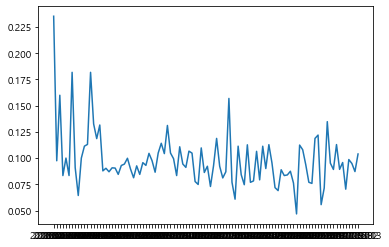

In [144]:
plt.plot(trend.index[:100], trend.topic1[:100])
plt.show()

# 03. 워드투벡
## Petition_W2V_D2V

In [146]:
import csv

contents = []
labels = []
with open('petition_sample(3).csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row: #그 줄에 내용이 있는 경우에만
            contents.append(row[0]) #청원내용을 contents 리스트에 추가
            labels.append(row[1]) #청원 category를 labels 리스트에 추가

In [147]:
print('documents size:', len(contents))
print('labels:', set(labels))
print('document sample:', contents[0])

documents size: 4000
labels: {'일자리', '미래', '육아/교육', '반려동물'}
document sample: 만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 자영업을 하는 사람입니다.\n국정운영을 너무 잘해주셔서  감사하다는 인사를 먼저드리겠습니다.\n제가 청원 드리고자 하는 사안은 아래와 같습니다.\n그 사안은 개성공단 관련 부분입니다.\n이 사안은 오래전 개성공단이 폐쇄 되고, 그와 관련되어 문제들이 돌출되면서 한번씩 생각해봤습니다.\n개성공단의 상징성은 제가 부연하지 않아도 아주 잘 아실거라 생각 하고 요점만 정리하여 말씀드리겠습니다.\n저는 개성공단을 북측에 꼭 설치 해야되나 하는 의문이 계속 들었습니다.\n북측과 인접한 강원도의 적합한 지역에 제2의 개성공단을  설치하면 안되나 하고 말이지요.\n공단이 설치가 된다면, 강원지역의 경제활성화와 중소기업에 돌아가는 혜택, 북측에 공단이 위치했을때\n지리적 불안전에서 오는 위험 해소, 제2의 개성공단이라는 남북화해의 상징성 등을 두루 갖추지 않을까 싶습니다.\n또한 요즘 처럼 대북관계의 긴장감에서 오는 불안함이 제2의 개성공단 설치로 인하여 대화의 창구를 열어\n관계를 계속 유지해간다면 긴장감이 어느 정도 해소 되지 않을까 싶습니다.\n이상으로 부족한 글 읽어주셔서 감사합니다.


In [148]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(contents, labels, random_state=0)

In [149]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()
#twitter_tag = Twitter()

In [150]:
def tokenize(doc):
    #return list(filter (lambda token: len(token) > 1, twitter_tag.morphs(doc)))
    return list(filter (lambda token: len(token) > 1, twitter_tag.nouns(doc)))

In [151]:
print(twitter_tag.nouns(X_train[1])[:100])

['문재인', '대통령', '국정', '책임', '수고', '항상', '마음속', '응원', '지지', '저', '대기업', '통신사', '협력', '업체', '외주', '노동자', '우리', '문재인', '정부', '서민', '위', '사람', '먼저', '국정', '철학', '부합', '진정', '현실', '좀더', '면', '보고', '우선', '제', '생업', '일자리', '수입', '구조', '말씀', '저', '통신', '공사', '관련', '일', '외주', '노동자', '생활', '년', '가장', '아이', '명', '이일', '아이', '물런', '한번', '안정', '고정', '수입', '우리나라', '통신사', '대기업', '구조', '이', '협력', '업체', '지역구', '어서', '모든', '설치', '시공', '설비', '관련', '장일', '그', '영세', '협력', '업체', '대부분', '외주', '일용직', '노동자', '능직', '이', '의', '관점', '그', '일', '생업', '것', '고정', '여제', '대부분', '건', '얼마', '정액', '제', '수입', '불', '안정', '있을떄', '못']


In [152]:
print(twitter_tag.morphs(X_train[1])[:100])

['문재인', '대통령', '님', ',', '국정', '을', '책임', '지느라', '수고', '가', '많습니다', '항상', '마음속', '으로', '응원', '하고', '지지', '합니다', '\\', 'n', '저', '는', '대기업', '통신사', '들', '의', '협력', '업체', '에서', '일을하는', '외주', '노동자', '입니다', '\\', 'n', '우리', '문재인', '정부', '가', '서민', '을', '위', '하고', '사람', '이', '먼저', '이다', '라는', '국정', '철학', '에', '부합', '하고자', '한다면', '진정', '현실', '을', '\\', 'n', '좀더', '면', '면', '희', '들여다', '보고', '아셔야', '합니다', '안타깝습니다', '\\', 'n', '우선', ',', '제', '가', '생업', '으로', '하고있는', '일자리', '수입', '원', '구조', '부터', '말씀', '드리겠습니다', '\\', 'n', '저', '는', '통신', '공사', '관련', '일', '을', '하고', '있는', '외주', '노동자', '생활', '을', '근']


In [153]:
print(tokenize(X_train[1])[:100])

['문재인', '대통령', '국정', '책임', '수고', '항상', '마음속', '응원', '지지', '대기업', '통신사', '협력', '업체', '외주', '노동자', '우리', '문재인', '정부', '서민', '사람', '먼저', '국정', '철학', '부합', '진정', '현실', '좀더', '보고', '우선', '생업', '일자리', '수입', '구조', '말씀', '통신', '공사', '관련', '외주', '노동자', '생활', '가장', '아이', '이일', '아이', '물런', '한번', '안정', '고정', '수입', '우리나라', '통신사', '대기업', '구조', '협력', '업체', '지역구', '어서', '모든', '설치', '시공', '설비', '관련', '장일', '영세', '협력', '업체', '대부분', '외주', '일용직', '노동자', '능직', '관점', '생업', '고정', '여제', '대부분', '얼마', '정액', '수입', '안정', '있을떄', '실정', '그것', '이일', '종사', '사람', '전국', '적지', '그간', '대기업', '협력', '업체', '갑질', '둘째', '간다', '해도', '임금', '지급', '대기업', '먼저']


In [154]:
train_texts = [tokenize(text) for text in X_train]
test_texts = [tokenize(text) for text in X_test]

In [155]:
print('train text counts:', len(train_texts), ', test text counts:', len(test_texts))
print("train text sample", X_train[1])
print("tokenized result", train_texts[1])
print("test text sample", X_test[0])
print("tokenized result", test_texts[1])

train text counts: 3000 , test text counts: 1000
train text sample 문재인 대통령님, 국정을 책임 지느라 수고가 많습니다 항상 마음속으로 응원하고 지지합니다\n저는 대기업 통신사들의 협력업체 에서 일을하는 외주 노동자 입니다\n우리 문재인 정부가 서민을 위하고 사람이 먼저이다 라는 국정철학에  부합 하고자 한다면 진정 현실을\n좀더 면면희 들여다 보고 아셔야 합니다  안타깝습니다\n우선, 제가 생업으로 하고있는 일자리 수입원 구조부터 말씀 드리겠습니다\n저는 통신공사 관련일을 하고 있는 외주 노동자 생활을 근 20여년 해오고 있는 가장 입니다\n아이가 3명이고 이일을 해서 아이들을 키우고 있습니다\n물런 단한번도 안정적 이고 고정적인 수입이 없었습니다  그러면 우리나라 통신사 대기업들의 구조를\n보면 이들은 협력업체를 지역구에 두어서 모든 설치 시공 설비 관련 현장일을 시키고 있습니다\n그 영세한 협력업체들은 대부분 외주 일용직 노동자 들을 (기능직 이죠) 저의관점 에서는\n그 일을 생업으로 하는 것이 고정급여제가 아니고 대부분 한건당 얼마의 정액제 입니다\n그러다 보니 수입은 불안정 하고 일이 있을떄는 하고 없으면 못하고 그런실정 입니다\n그것까지 탓을 할수는 없다는것은 알고 있습니다\n이일에 종사하는 사람들이 전국에 적지 않습니다,\n그간 대기업들의 협력업체들 에게 갑질이니, 머니 그런것은 둘째로 치고 넘어 간다고 해도\n임금 지급은 당연히 대기업 에서 먼저 물어야 하는데  온갇 이유를 들어 일을한지 월수로는 3개월 인데도\n미비한것이 있다고 하여, 한푼도 지급하지 않고 있는 이런 행태를 과연\n누가 진정 단한사람도 알고나 있는지요\n대기업협력사 들은 고양이 목에 방울거는 형태라 말한마디도 못하고  그 영세한 협력업체들은\n대기업들 에서 정산이 안되었다고 하며 돈을 지급하지 않고\n그러면 그 노동자 들은 어떻겠습니까?\n그런 오랜 악습이 수십년 동안 진행 되다가 지금은 다소 개선이 된줄알고 있는데 예전보다

## Word2Vec

Word2Vec으로 무엇을 할 수 있을까?

In [156]:
import gensim.downloader as api

word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

[==================================================] 100.0% 128.1/128.1MB downloaded


In [157]:
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [160]:
result

[('queen', 0.896455705165863),
 ('monarch', 0.8495979309082031),
 ('throne', 0.8447030782699585),
 ('princess', 0.8371669054031372),
 ('elizabeth', 0.8356794714927673),
 ('daughter', 0.8348595499992371),
 ('prince', 0.8230059742927551),
 ('mother', 0.8154449462890625),
 ('margaret', 0.8147734999656677),
 ('father', 0.8100854158401489)]

In [161]:
result = word_vectors.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8965


In [162]:
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


C:\Users\soo hyun\anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [163]:
!pip install pyemd

similarity = word_vectors.similarity('woman', 'man')
print(similarity > 0.8)

  Running setup.py clean for pyemd
Failed to build pyemd
    Running setup.py install for pyemd: started
    Running setup.py install for pyemd: finished with status 'error'
True


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\soo hyun\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\soo hyun\\AppData\\Local\\Temp\\pip-install-9857s4qa\\pyemd\\setup.py'"'"'; __file__='"'"'C:\\Users\\soo hyun\\AppData\\Local\\Temp\\pip-install-9857s4qa\\pyemd\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\soo hyun\AppData\Local\Temp\pip-wheel-k5m7q7c9'
       cwd: C:\Users\soo hyun\AppData\Local\Temp\pip-install-9857s4qa\pyemd\
  Complete output (11 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pyemd
  copying pyemd\__about__.py -> build\lib.win-amd64-3.8\pyemd
  copying pyemd\__init__.py -> build\lib.win-amd64-3.8\pyemd
  running build_ext
  building 'pyemd

In [164]:
result = word_vectors.similar_by_word("cat")
print("{}: {:.4f}".format(*result[0]))

dog: 0.8798


In [ ]:
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()

similarity = word_vectors.wmdistance(sentence_obama, sentence_president)
print("{:.4f}".format(similarity))

In [166]:
distance = word_vectors.distance("media", "media")
print("{:.1f}".format(distance))

0.0


In [167]:
sim = word_vectors.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])
print("{:.4f}".format(sim))

0.7067


In [168]:
vector = word_vectors['computer']  # numpy vector of a word
print(vector.shape)

(100,)


In [169]:
vector = word_vectors.wv.word_vec('office', use_norm=True)
print(vector.shape)

(100,)


Word2Vec으로 직접 학습해보자

In [170]:
#train
from gensim.models import word2vec

wv_model_ko = word2vec.Word2Vec(train_texts)
wv_model_ko.init_sims(replace=True)

wv_model_ko.save('petition_sample_w2v.model')

In [171]:
#유사한 단어 추출
print(wv_model_ko.wv.most_similar('청소년'))

[('소년법', 0.9951703548431396), ('악용', 0.9948495626449585), ('폐지', 0.9926279783248901), ('소년', 0.9878897070884705), ('범죄', 0.9846632480621338), ('테두리', 0.9836496114730835), ('성인', 0.9833707213401794), ('미성년', 0.9761254787445068), ('용서', 0.972411036491394), ('피해자', 0.9713164567947388)]


In [172]:
# 다른 단어들과 가장 거리가 먼 단어
print(test_texts[0])
wv_model_ko.wv.doesnt_match(test_texts[0])

['저희', '학습', '병행', '제라', '제도', '직장인', '대학생', '저희', '고등학교', '학습', '병행', '제로', '취업', '시작', '완료', '과정', '학습', '병행', '법률', '이상', '학습', '병행', '제도', '실시', '업체', '폐지', '상황', '당장', '이번', '중순', '시기', '이후', '저희', '강제', '학습', '병행', '저희', '지금껏', '시간', '나이', '나이', '지역', '직장', '대학교', '오가면', '직접', '일찍', '혼자', '사회', '생활', '목표', '마음가짐', '이제', '노력', '거품', '대통령', '제발', '포함', '학습', '병행', '친구', '이번', '학습', '병행', '마무리', '시간', '저희', '미래', '가장', '터닝', '포인트']


C:\Users\soo hyun\anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'대통령'

## Doc2Vec

In [173]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_texts)]
dv_model = Doc2Vec(tagged_data)

In [174]:
dv_train = [dv_model.infer_vector(doc) for doc in train_texts]
dv_test = [dv_model.infer_vector(doc) for doc in test_texts]

In [175]:
len(dv_train)

3000

In [176]:
dv_train[0]

array([-0.03231131,  0.03338436,  0.01152686,  0.00440312, -0.01394957,
       -0.01853555,  0.02308786, -0.0006188 , -0.01250095,  0.00100537,
        0.00881854, -0.01272337, -0.01103382,  0.03352343, -0.00310035,
        0.04082499, -0.04397612,  0.00272922,  0.01067165, -0.01473957,
       -0.01025413,  0.01469194, -0.02050976, -0.01530816, -0.04830897,
       -0.03757297, -0.00524206,  0.00225444, -0.01254397, -0.02740696,
        0.00197559, -0.00706914, -0.01333867, -0.01246298, -0.03987002,
       -0.02806319, -0.00519512,  0.0123176 ,  0.00710583,  0.00223154,
        0.01118659,  0.01233587, -0.0079668 ,  0.00516024, -0.0119346 ,
        0.00742452,  0.0068448 , -0.03337765,  0.02792227,  0.01743729,
        0.01472645,  0.02507341, -0.01710917, -0.01241721,  0.00561565,
        0.00036091,  0.01427187,  0.00624426, -0.01432232, -0.01326447,
        0.00733306,  0.00925819, -0.00086152,  0.0324468 , -0.00391639,
       -0.01540476,  0.00114901, -0.01549077,  0.01620086,  0.02

In [177]:
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression() #분류기 선언
clf.fit(dv_train, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(dv_train, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(dv_test, y_test))) # test data에 대한 예측정확도

Train set score: 0.685
Test set score: 0.639


In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc_train = scaler.fit_transform(dv_train)
sc_test = scaler.transform(dv_test)

clf.fit(sc_train, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(sc_train, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(sc_test, y_test))) # test data에 대한 예측정확도

Train set score: 0.718
Test set score: 0.657


C:\Users\soo hyun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
dv_model.docvecs.most_similar(1)

[(624, 0.9981637597084045),
 (2662, 0.9964050054550171),
 (947, 0.9943066835403442),
 (1491, 0.9932825565338135),
 (96, 0.9931917190551758),
 (903, 0.9904451370239258),
 (246, 0.9901315569877625),
 (2358, 0.9900680780410767),
 (1803, 0.9898505210876465),
 (2016, 0.9897720813751221)]

In [180]:
X_train[947]

'인천 연수구에 위치한 해외투자기업과 손잡고 있는 한라그룹 만도 와 독일 헬라 사가 합작하여 만든 회사입니다. 8년정도 된 회사가 엄청난 발전을 하였습니다. 누군가의 의해서.. 그 누군가가 과연\\n어떤 사람들 일까요..? 100% 비정규직으로 구성된\\n생산직과 생산관리,  품질 부서의 노동자들입니다.\\n2~30대 젊은 노동자들이 악덕기업 불법기업 만도헬라\\n정규직 사람들에게 직접적인 업무지시, 폭언, 괄시와 멸시, 무시, 성희롱을 일삼고 근무를 해왔습니다.\\n더이상 비정규직 노동자들은 참지못해 이듬해 2월에\\n노동조합을 결성하였습니다. 노동조합을 설립하자마자 원청회사인 만도헬라에서는 노조탄압과 협박을 하고 도급계약해지와 불안정한 알바고용,\\n원청직원들의 대체생산을 하였습니다. 대한민국의 청년들이 일하는 글로벌기업 공장에서 이게 왠말입니까.. 매년 오르고있는 매출액은 누구의 고생에서 나왔을까요? 비정규직 노동자들입니다.\\n1년365일중 340일을 출근하는 노동자들도 있습니다.\\n그렇게 12시간 주야2교대를 근무해야 가져가는 연봉은 4천만원대.. 정규직은 가방끈이 길다고 주 5일제 8시간 탄력근무제를 적용하여 초봉 5800만원\\n이게 말이됩니까? 해도해도 너무한거 같습니다.\\n문재인 대통령님께서 비정규직 제로화를 공약으로 내걸었습니다. 하지만 바뀐것이 뭐가 있습니까? 아무것도 없습니다. 공공기관만 신경쓰시고 민간기업은 관심조차 없어보입니다.\\n공약으로 내걸었던 비정규직 철폐에 힘써주시기 부탁드립니다!'

In [181]:
X_train[1]

'문재인 대통령님, 국정을 책임 지느라 수고가 많습니다 항상 마음속으로 응원하고 지지합니다\\n저는 대기업 통신사들의 협력업체 에서 일을하는 외주 노동자 입니다\\n우리 문재인 정부가 서민을 위하고 사람이 먼저이다 라는 국정철학에  부합 하고자 한다면 진정 현실을\\n좀더 면면희 들여다 보고 아셔야 합니다  안타깝습니다\\n우선, 제가 생업으로 하고있는 일자리 수입원 구조부터 말씀 드리겠습니다\\n저는 통신공사 관련일을 하고 있는 외주 노동자 생활을 근 20여년 해오고 있는 가장 입니다\\n아이가 3명이고 이일을 해서 아이들을 키우고 있습니다\\n물런 단한번도 안정적 이고 고정적인 수입이 없었습니다  그러면 우리나라 통신사 대기업들의 구조를\\n보면 이들은 협력업체를 지역구에 두어서 모든 설치 시공 설비 관련 현장일을 시키고 있습니다\\n그 영세한 협력업체들은 대부분 외주 일용직 노동자 들을 (기능직 이죠) 저의관점 에서는\\n그 일을 생업으로 하는 것이 고정급여제가 아니고 대부분 한건당 얼마의 정액제 입니다\\n그러다 보니 수입은 불안정 하고 일이 있을떄는 하고 없으면 못하고 그런실정 입니다\\n그것까지 탓을 할수는 없다는것은 알고 있습니다\\n이일에 종사하는 사람들이 전국에 적지 않습니다,\\n그간 대기업들의 협력업체들 에게 갑질이니, 머니 그런것은 둘째로 치고 넘어 간다고 해도\\n임금 지급은 당연히 대기업 에서 먼저 물어야 하는데  온갇 이유를 들어 일을한지 월수로는 3개월 인데도\\n미비한것이 있다고 하여, 한푼도 지급하지 않고 있는 이런 행태를 과연\\n누가 진정 단한사람도 알고나 있는지요\\n대기업협력사 들은 고양이 목에 방울거는 형태라 말한마디도 못하고  그 영세한 협력업체들은\\n대기업들 에서 정산이 안되었다고 하며 돈을 지급하지 않고\\n그러면 그 노동자 들은 어떻겠습니까?\\n그런 오랜 악습이 수십년 동안 진행 되다가 지금은 다소 개선이 된줄알고 있는데 예전보다는 나아졌는데\\n이들 대기업들의 해묵은 악습은 또다시 명절을 앞두고 있는 지금 

# 04. keras RNN 기반 문서 분류
## keras embedding을 이용한 문서 분류
### 영화리뷰 데이터 대상

In [187]:
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids() #movie review data에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file id를 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 
#file id를 이용해 label로 사용할 category 즉 positive와 negative 정보를 순서대로 가져옴

print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Labels:', set(categories))

Reviews count: 2000
Length of the first review: 4043
Labels: {'neg', 'pos'}


In [190]:
!pip install keras

In [192]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=ca9bf79384bcb8f81312239a8878959ee4eadc91c6321498b8388ad8ac1a8651
  Stored in directory: c:\users\soo hyun\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [193]:
from keras.preprocessing.text import Tokenizer

max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)

X = tokenizer.texts_to_sequences(reviews)
# 일반적으로 0이면 unknown, 즉 전체단어의 수가 10000개 - num_words가 넘을 경우, index가 10000-1(for unknown)을 넘어가는 단어는 0으로 처리함
#onehot_train = tokenizer.texts_to_matrix(X_train, mode='binary')

print('num of tokens:', len(tokenizer.word_index))

num of tokens: 43296


In [194]:
bow = tokenizer.texts_to_matrix(reviews, mode='binary')
bow.shape

(2000, 10000)

In [195]:
from keras import preprocessing

maxlen = 500

X = preprocessing.sequence.pad_sequences(X, maxlen=maxlen, truncating='pre')
print(X[0])

[  38    1  328   52   20  769   52   20   52   20    2    4  910  114
   52   20 5277    4 1386  171    8  632    3   63    4    9    6  321
   25 1957  143   18 2926  120  301  254    5 9489    2   15  150  143
    3  102   16   44   35    9   91    6  256  103    1  164 2851  100
    3  100  208   18   72  259    4 4077   42   82    2   94   45    6
   14  247  954  353   37  613  294   14  133  801    5 3146   16    9
  138    5  257    5 3146    9  308  313   64  369  493  226    3   75
   36   86  171  439 2795   46   56 1747    7    1 5675   25   92    1
 1280  204    6    8    1 4078    3   18  158 5676   19 1711   38   14
   39   62  175 4079   63    4    9   40   21    1  268   84  212   39
   35    4    1   82    8  197  442    5   86    2   98  251    4  261
   16    9  137  248    1   86    1   15   35    8   43  439   18  618
    1 1486  311   11  121   38   14    6    8   34  167  245   86  276
    8    1  161    6   55    9   56  141   36   20  284    1  801    5
 2016 

In [222]:
import numpy
label_dict = {'pos':0, 'neg':1}
y = [label_dict[c] for c in categories]
y = numpy.array(y) 
print(y[:10])

[1 1 1 1 1 1 1 1 1 1]


In [223]:
from sklearn.model_selection import train_test_split #sklearn에서 제공하는 split 함수를 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# sklearn의 train_test_split 함수는 먼저 data set을 shuffle하고 주어진 비율에 따라 train set과 test set을 나눠 줌
# 위에서는 reviews를 X_train과 X_test로 8:2의 비율로 나누고, categories를 y_train과 y_test로 나눔
# 이 때 X와 y의 순서는 동일하게 유지해서 각 입력값과 label이 정확하게 match되도록 함
# random_state는 shuffle에서의 seed 값으로, 지정한 경우 항상 동일한 결과로 shuffle이 됨

print('Train set count:', len(X_train))
print('Test set count:', len(X_test))
print('Test samples:', y_test[:20])

Train set count: 1600
Test set count: 400
Test samples: [1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0]


In [224]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
flatten_10 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
5/5 [==============================] - 1s 252ms/step - loss: 0.6941 - acc: 0.5078 - val_loss: 0.6925 - val_acc: 0.5250
Epoch 2/30
5/5 [==============================] - 0s 97ms/step - loss: 0.6406 - acc: 0.9164 - val_loss: 0.6915 - val_acc: 0.5281
Epoch 3/30
5/5 [==============================] - 0s 76ms/step - loss: 0.5988 - acc: 0.9508 - val_loss: 0.6901 - val_a

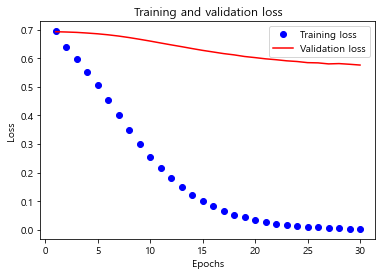

In [225]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [226]:
score = model.evaluate(X_test, y_test)
print(score)

13/13 [==============================] - 0s 4ms/step - loss: 0.5365 - acc: 0.7250
[0.5364832878112793, 0.7250000238418579]


In [227]:
from keras.layers import SimpleRNN, LSTM

model = Sequential()
model.add(Embedding(max_words, 32))
#model.add(SimpleRNN(32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [228]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2)

Epoch 1/30
5/5 [==============================] - 9s 2s/step - loss: 0.6930 - acc: 0.5102 - val_loss: 0.6920 - val_acc: 0.5344
Epoch 2/30
5/5 [==============================] - 5s 1s/step - loss: 0.6865 - acc: 0.6992 - val_loss: 0.6885 - val_acc: 0.6062
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 0.6594 - acc: 0.8047 - val_loss: 0.6392 - val_acc: 0.6344
Epoch 4/30
5/5 [==============================] - 5s 1s/step - loss: 0.5849 - acc: 0.7695 - val_loss: 0.5713 - val_acc: 0.7031
Epoch 5/30
5/5 [==============================] - 5s 960ms/step - loss: 0.5711 - acc: 0.8164 - val_loss: 0.5800 - val_acc: 0.7156
Epoch 6/30
5/5 [==============================] - 5s 945ms/step - loss: 0.5261 - acc: 0.8055 - val_loss: 0.5766 - val_acc: 0.7625
Epoch 7/30
5/5 [==============================] - 5s 1s/step - loss: 0.4358 - acc: 0.8852 - val_loss: 0.5707 - val_acc: 0.7531
Epoch 8/30
5/5 [==============================] - 5s 1s/step - loss: 0.4207 - acc: 0.8836 - val_loss: 0.5

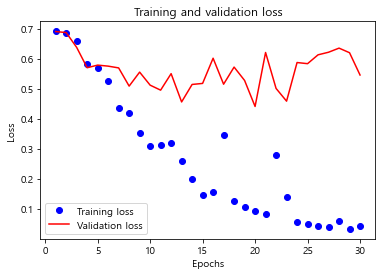

In [229]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

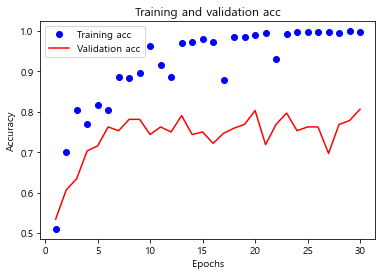

In [230]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [231]:
score = model.evaluate(X_test, y_test)
print(score)

13/13 [==============================] - 2s 190ms/step - loss: 0.5560 - acc: 0.7875
[0.5560495853424072, 0.7875000238418579]


#### 문제점: train set의 크기가 너무 작다
해결방안: train set을 충분히 늘리거나, pre-trained embedding vector를 사용

## pre-trained embedding을 사용
GloVe: https://nlp.stanford.edu/projects/glove <br>
다운 받아서 datasets 폴더 안에 압축을 풀고 그 중에서 glove.6B.100d.txt를 사용<br>

파일 안의 모양: 단어 + 단어의 100차원 vector 집합으로 이루어져 있음<br>

예) the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

한 라인은 하나의 단어와 그 단어의 vector로 이루어져 있으므로, 각 라인에 대해 첫 token을 word로, 나머지 100 token을 vector로 변환하면 됨 

In [337]:
glove_dir = './datasets/'
import os
import numpy as np

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Num of word vectors:', len(embeddings_index))

Num of word vectors: 400000


In [338]:
# 처음 데이터를 생성할 때 사용한 tokenizer에서 word_index를 추출
# 이 word_index에 맞게 glove로부터 해당하는 word vector를 가져옴
word_index = tokenizer.word_index
len(word_index)

43296

In [339]:
#embedding matrix를 생성: word_index에서 max_words 만큼의 단어에 대해 glove의 embeddings_index를 추출하여 matrix 생성
#추출한 matrix는 embedding 층의 weight로 고정해서 사용함

embedding_dim = 100 # glove의 vector dimension
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [340]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import SimpleRNN, LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
#model.add(SimpleRNN(32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [341]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False #값을 고정
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 100)         1000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,017,057
Trainable params: 17,057
Non-trainable params: 1,000,000
_________________________________________________________________


In [342]:
from keras import optimizers
#rmsprop = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0) #default lr은 0.001
#rmsprop = optimizers.RMSprop(lr=0.005) #default lr은 0.001
adam = optimizers.Adam(lr=0.005) #default lr은 0.001

# pre-train이 되어 있으므로 적은 수의 test set으로도 학습이 가능
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2) 
#model.save_weights('pre_trained_glove_model.h5')

Epoch 1/30
5/5 [==============================] - 9s 2s/step - loss: 0.7059 - acc: 0.5078 - val_loss: 0.6922 - val_acc: 0.5031
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 0.6734 - acc: 0.5898 - val_loss: 0.6825 - val_acc: 0.5750
Epoch 3/30
5/5 [==============================] - 6s 1s/step - loss: 0.6661 - acc: 0.5891 - val_loss: 0.6710 - val_acc: 0.5906
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.6493 - acc: 0.6297 - val_loss: 0.6619 - val_acc: 0.5969
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 0.6258 - acc: 0.6539 - val_loss: 0.6270 - val_acc: 0.6531
Epoch 6/30
5/5 [==============================] - 6s 1s/step - loss: 0.6320 - acc: 0.6375 - val_loss: 0.6112 - val_acc: 0.6750
Epoch 7/30
5/5 [==============================] - 6s 1s/step - loss: 0.6132 - acc: 0.6477 - val_loss: 0.6480 - val_acc: 0.6250
Epoch 8/30
5/5 [==============================] - 6s 1s/step - loss: 0.6197 - acc: 0.6453 - val_loss: 0.6520 - 

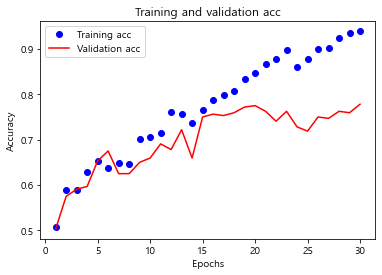

In [343]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [344]:
score = model.evaluate(X_test, y_test)
print(score)

13/13 [==============================] - 3s 196ms/step - loss: 0.6021 - acc: 0.7525
[0.6021198034286499, 0.7524999976158142]


### glove를 사용하지 않으면서 좀 더 정교한 모형을 사용하여 학습
optimizer를 정교하게 조정하고, regularizer를 추가

In [345]:
from keras.layers import SimpleRNN, LSTM
from keras import regularizers

model = Sequential()
model.add(Embedding(max_words, 32))
#model.add(SimpleRNN(32))
model.add(LSTM(32))
#model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.1))) #0.01을 먼저 시도했음

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [346]:
from keras import optimizers
#adam = optimizers.Adam(lr=0.005) #default lr은 0.001
rmsprop = optimizers.RMSprop(lr=0.005) #default lr은 0.001

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['acc']) 
#lr 조절 없고 l2=0.01일 때 test 0.775 나옴

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=256,
                    validation_split=0.2) 

Epoch 1/30
5/5 [==============================] - 13s 3s/step - loss: 0.8299 - acc: 0.5203 - val_loss: 0.7942 - val_acc: 0.5813
Epoch 2/30
5/5 [==============================] - 7s 1s/step - loss: 0.8335 - acc: 0.6109 - val_loss: 0.7628 - val_acc: 0.5844
Epoch 3/30
5/5 [==============================] - 7s 1s/step - loss: 0.6653 - acc: 0.7914 - val_loss: 0.8067 - val_acc: 0.5094
Epoch 4/30
5/5 [==============================] - 7s 1s/step - loss: 0.5762 - acc: 0.8398 - val_loss: 0.7843 - val_acc: 0.6062
Epoch 5/30
5/5 [==============================] - 7s 1s/step - loss: 0.4769 - acc: 0.8773 - val_loss: 0.7276 - val_acc: 0.6750
Epoch 6/30
5/5 [==============================] - 7s 1s/step - loss: 0.4398 - acc: 0.8789 - val_loss: 0.6799 - val_acc: 0.7000
Epoch 7/30
5/5 [==============================] - 8s 2s/step - loss: 0.3084 - acc: 0.9578 - val_loss: 0.7823 - val_acc: 0.6219
Epoch 8/30
5/5 [==============================] - 8s 2s/step - loss: 0.2954 - acc: 0.9594 - val_loss: 0.7678 -

In [347]:
score = model.evaluate(X_test, y_test)
print(score)

13/13 [==============================] - 2s 183ms/step - loss: 0.7780 - acc: 0.7500
[0.7779614329338074, 0.75]
